Attaching all the necessary evil:

In [4]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# To plot pretty figures
import matplotlib

import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import seaborn as sns

%matplotlib inline

import pandas as pd

import numpy as np

import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

from scipy.sparse import csr_matrix

# to make this notebook's output stable across runs
np.random.seed(42)

Now to load the data to work on:

In [5]:
data = pd.read_csv("spam.csv",encoding='latin-1')

data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

data = data.rename(columns={"v1":"label", "v2":"text"})

data['label_num'] = data.label.map({'ham':0, 'spam':1})

X_train,X_test,y_train,y_test = train_test_split(data["text"],data["label"],test_size = 0.2, random_state = 10)

Cooking the data to make it more edible:

In [6]:
vect = CountVectorizer()

vect.fit(X_train)

X_train_df = vect.transform(X_train).toarray()

X_test_df = vect.transform(X_test).toarray()

print(X_train.size)
print(y_train.size)

4457
4457


Implementation of Multinominal Naive Bayess method:

In [7]:
class MultinomialNB(object):
    def __init__(self, alpha=1.0):
        self.alpha = alpha

    def fit(self, X, y):
        count_sample = X.shape[0]
        
        separated = [[x for x, t in zip(X, y) if t == c] for c in np.unique(y)]     
        
        self.class_log_prior_ = [np.log(len(i) / count_sample) for i in separated]
        
        count = np.array([np.array(i).sum(axis=0) for i in separated]) + self.alpha
       
        # log probability of each word
        self.feature_log_prob_ = np.log(count / count.sum(axis=1)[np.newaxis].T)
        
        return self

    def predict_log_proba(self, X):
        return [(self.feature_log_prob_ * x).sum(axis=1) + self.class_log_prior_
                for x in X]
    
    def predict(self, X):
        return np.argmax(self.predict_log_proba(X), axis=1)
    
    def score(self, X, y):
        return sum(self.predict(X) == y) / len(y)

Checking out the results:

In [8]:
nb = MultinomialNB(alpha=1).fit(X_train_df, y_train)

prediction = nb.predict(X_test_df)

But first it's necessary to convert data to the same notation:

In [9]:
prediction = ['ham' if i == 0 else 'spam' for i in prediction]

accuracy_score(y_test,prediction)

0.9883408071748879

As show above, the prediction is alright. Accuracy score is the same as obtained using built-in sklearn library.

In [10]:
print(classification_report(y_test, prediction, target_names = ["Ham", "Spam"]))

             precision    recall  f1-score   support

        Ham       0.99      0.99      0.99       965
       Spam       0.97      0.95      0.96       150

avg / total       0.99      0.99      0.99      1115



As seen above, the results are on par with what we received from sklearn.

[[960   5]
 [  8 142]]


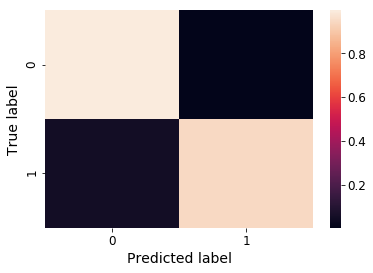

In [11]:
conf_mat = confusion_matrix(y_test, prediction)

conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

sns.heatmap(conf_mat_normalized)

plt.ylabel('True label')

plt.xlabel('Predicted label')

print(conf_mat)

Finally, precision and recall are:

In [12]:
precision_score = (conf_mat[1][1] / ( conf_mat[1][1] + conf_mat[0][1] ))

recall_score = (conf_mat[1][1] / ( conf_mat[1][1] + conf_mat[1][0] ))

print("Recall = ", recall_score)

print("Precision = ",precision_score)

Recall =  0.9466666666666667
Precision =  0.9659863945578231


Since the data set used for this homework is the same we used during classes, and the presented script works just the same as sklearn library, there's no need to compare the results with linear regression.

Life-saving source:
http://kenzotakahashi.github.io/naive-bayes-from-scratch-in-python.html